<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > MLOps Project </h1>
<h2 style = "text-align:center" > Credit Card Fraud </h2>
<hr style="border-width:2px;border-color:#75DFC1">



## About Dataset
Source: [kaggel](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

> Digital payments are evolving, but so are cyber criminals.

> According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

>In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.
This Dataset sourced by some unnamed institute.

### Feature Explanation:

>- **distancefromhome** - the distance from home where the transaction happened.
>- **distancefromlast_transaction** - the distance from last transaction happened.
>- **ratiotomedianpurchaseprice** - Ratio of purchased price transaction to median purchase price.
>- **repeat_retailer** - Is the transaction happened from same retailer.
>- **used_chip** - Is the transaction through chip (credit card).
>- **usedpinnumber** - Is the transaction happened by using PIN number.
>- **online_order** - Is the transaction an online order.
>- **fraud** - Is the transaction fraudulent.

In [1]:
import pandas as pd
import numpy as np
import bentoml as blm
import sklearn as sk
print(pd.__version__)
print(np.__version__)
print(sk.__version__)

1.5.1
1.23.4
1.1.3


## Open Dataset

In [2]:
df=pd.read_csv('Datasets/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
from pandas_profiling import ProfileReport

In [4]:
profil = ProfileReport(df, title="Credit Card Fraud Detector", html={'style':{'full_width':True}}
)

profil.to_file(output_file ='profil_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/pierresarzier/machinelearning/ML_Ops/Env/lib/python3.10/site-packages/multimethod/__init__.py:315: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)
/Users/pierresarzier/machinelearning/ML_Ops/Env/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5218: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df[df.fraud==1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [5]:
print(f"Our initial dataset has {len(df)} rows")

Our initial dataset has 1000000 rows


In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Data visualisation

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.12.0


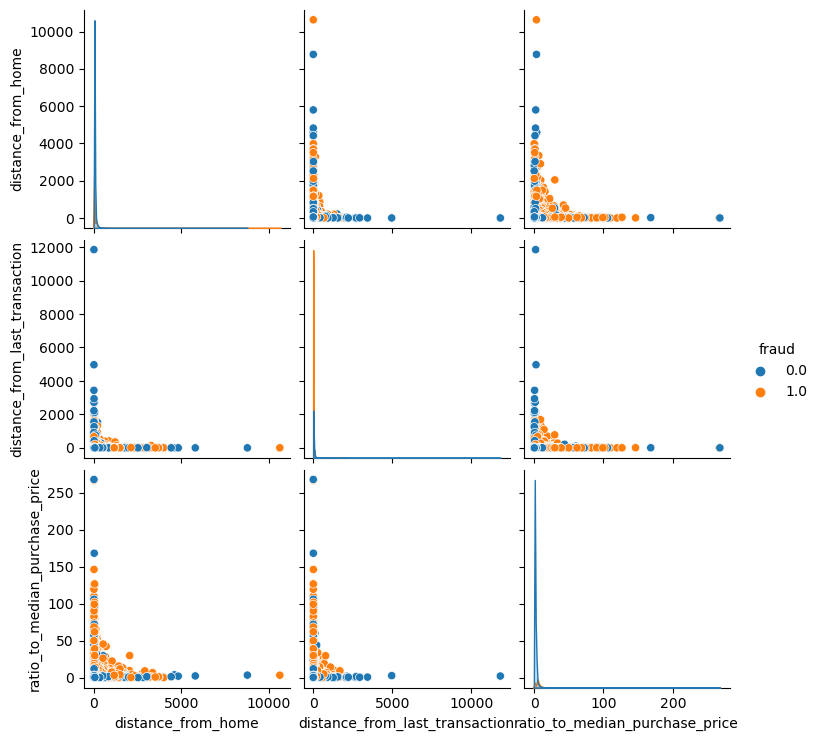

In [9]:
sns.pairplot(data=df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','fraud']], hue = 'fraud')
plt.show()

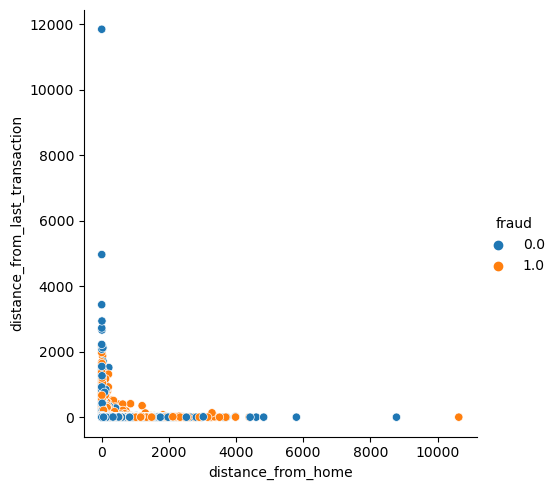

In [13]:
sns.relplot(x='distance_from_home', y='distance_from_last_transaction', hue='fraud', data=df)

<AxesSubplot:xlabel='distance_from_home', ylabel='Count'>

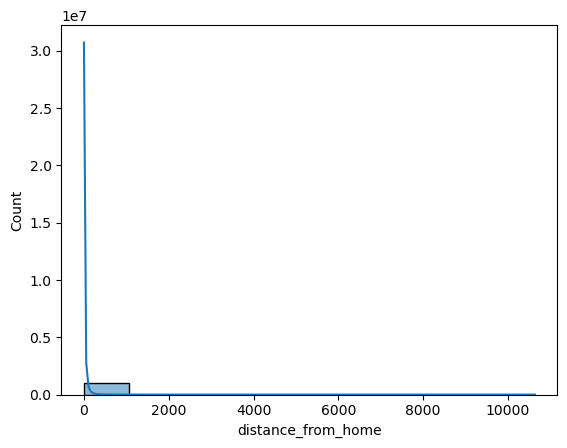

In [8]:
sns.histplot(df['distance_from_home'], bins=10, kde=True)

In [4]:
df['Log_home'] = np.log10(df['distance_from_home'])
df['Log_trans'] = np.log10(df['distance_from_last_transaction'])
df['Log_ratio'] = np.log10(df['ratio_to_median_purchase_price'])

<AxesSubplot:xlabel='Log_home', ylabel='Count'>

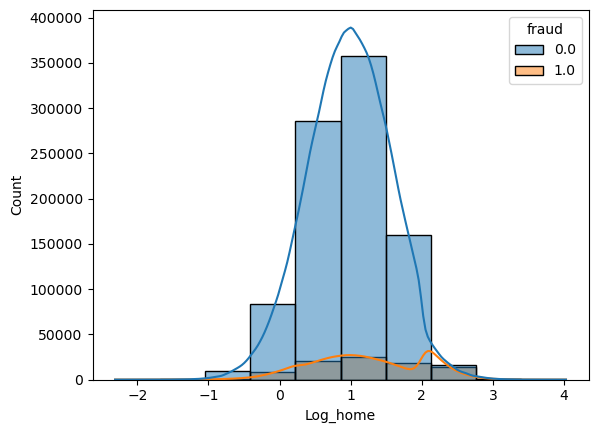

In [12]:
sns.histplot(data=df, x="Log_home", hue="fraud", bins=10, kde=True)

<AxesSubplot:xlabel='Log_trans', ylabel='Count'>

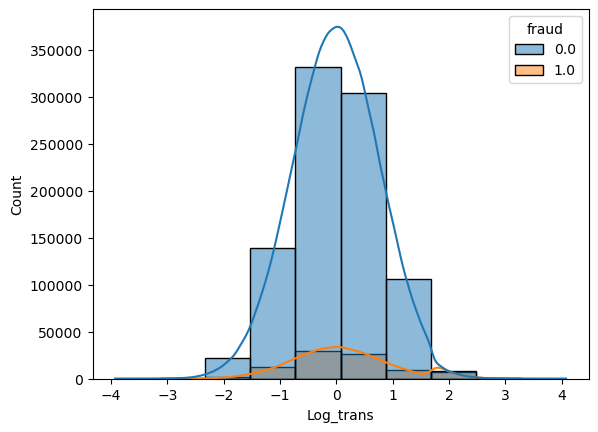

In [13]:
sns.histplot(data=df, x="Log_trans",hue="fraud", bins=10, kde=True)

<AxesSubplot:xlabel='Log_ratio', ylabel='Count'>

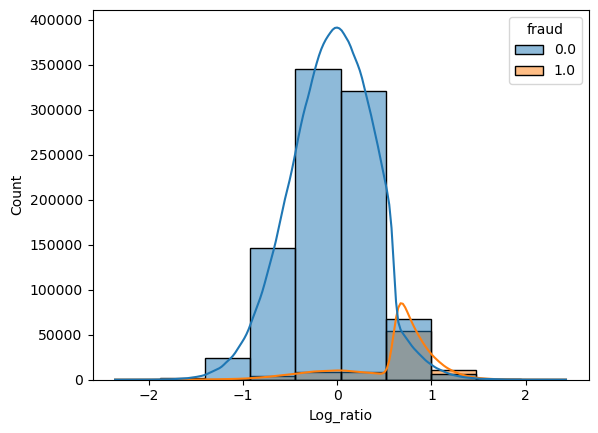

In [14]:
sns.histplot(data=df, x='Log_ratio',hue='fraud', bins=10, kde=True)

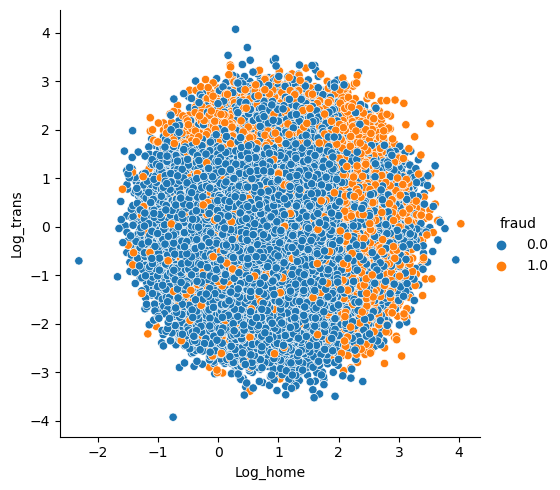

In [15]:
sns.relplot(x='Log_home', y='Log_trans', hue='fraud', data=df)

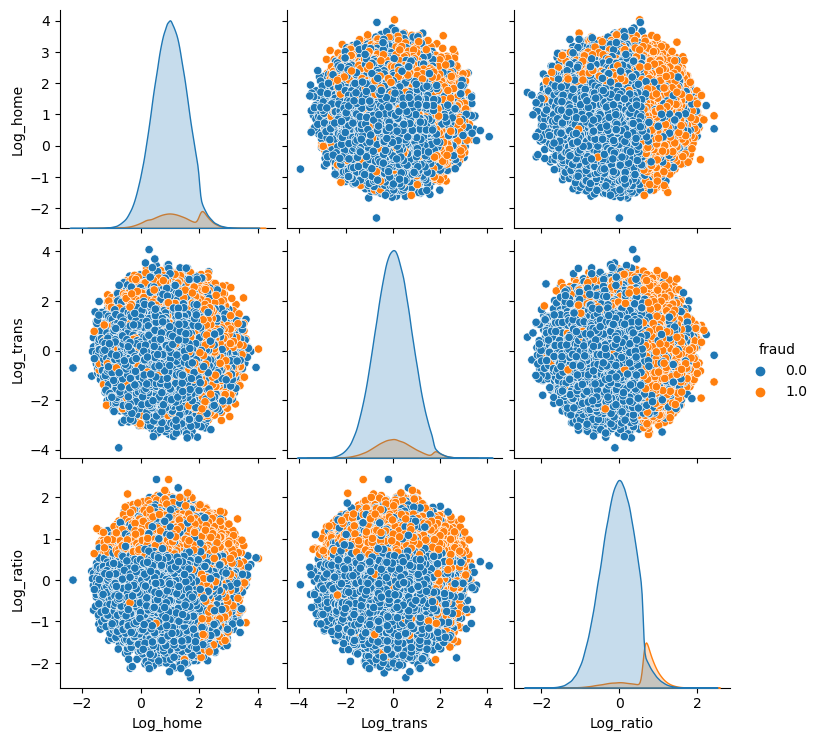

In [16]:
sns.pairplot(data=df[['Log_home','Log_trans','Log_ratio','fraud']], hue = 'fraud')
plt.show()

In [ ]:
df = df.drop(columns = ['Log_home','Log_trans','Log_ratio'])

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop(columns = ['fraud'])
y = df['fraud']

# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, 
                                                  stratify = y_train, random_state=42)
print(f"The TrainSet has {y_train.shape[0]} rows")
print(f"The TestSet has {y_test.shape[0]} rows")
print(f"The ValSet has {y_val.shape[0]} rows")
# Scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


The TrainSet has 640000 rows
The TestSet has 200000 rows
The ValSet has 160000 rows


## Decision Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model_dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
model_dt.fit(X_train_scaled,y_train)
print(f"Accuracy with scaler : {model_dt.score(scaler.transform(X_test),y_test)}")

Accuracy with scaler : 0.99999


In [8]:
model_dt.fit(X_train,y_train)
print(f"Accuracy without scaler : {model_dt.score(X_test,y_test)}")

Accuracy without scaler : 0.99999


In [9]:
# Scaler isn't mandatory

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

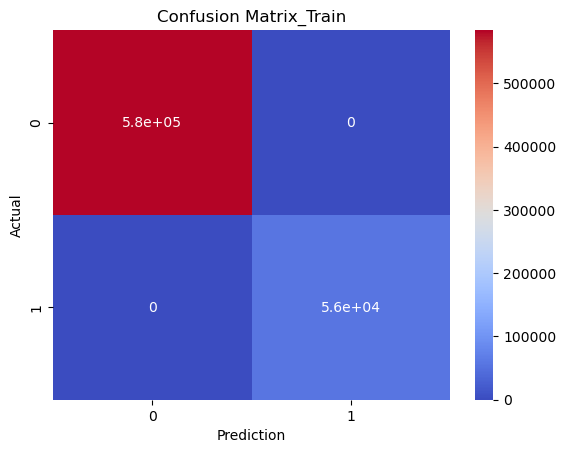

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    584062
         1.0       1.00      1.00      1.00     55938

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000



In [20]:
y_pred_train = model_dt.predict(X_train) 
c_matrix_train = confusion_matrix(y_train,y_pred_train)
ax = sns.heatmap(c_matrix_train, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Train')
plt.show()
print(classification_report(y_train, y_pred_train))

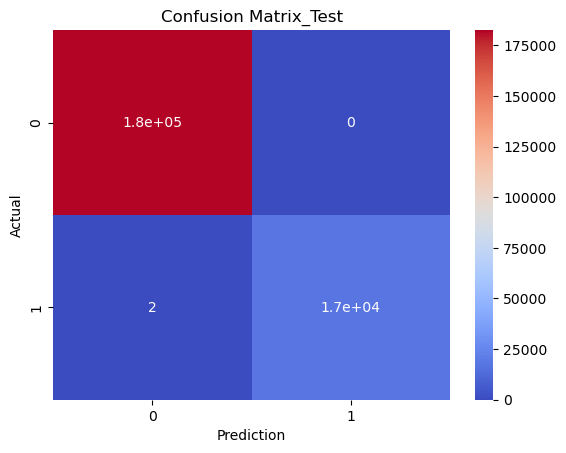

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [11]:
y_pred_test = model_dt.predict(X_test) 
c_matrix_test = confusion_matrix(y_test,y_pred_test)
ax = sns.heatmap(c_matrix_test, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Test')
plt.show()
print(classification_report(y_test, y_pred_test))

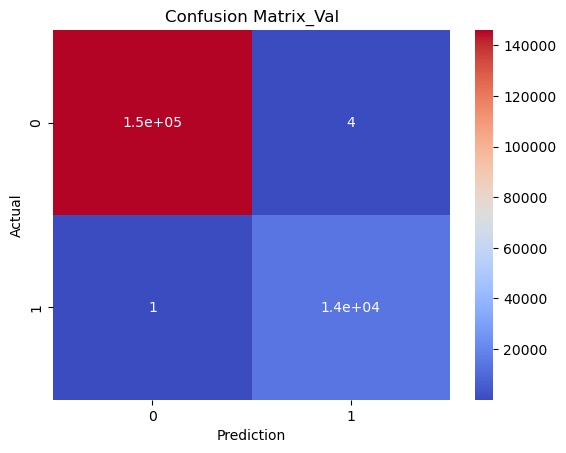

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    146016
         1.0       1.00      1.00      1.00     13984

    accuracy                           1.00    160000
   macro avg       1.00      1.00      1.00    160000
weighted avg       1.00      1.00      1.00    160000



In [12]:
y_pred_val = model_dt.predict(X_val) 
c_matrix_val = confusion_matrix(y_val,y_pred_val)
ax = sns.heatmap(c_matrix_val, annot=True, cmap='coolwarm')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
ax.set_title('Confusion Matrix_Val')
plt.show()
print(classification_report(y_val, y_pred_val))

In [13]:
y_test[y_test==1]

540581    1.0
105282    1.0
935066    1.0
915715    1.0
329500    1.0
         ... 
700722    1.0
922824    1.0
406010    1.0
517079    1.0
572138    1.0
Name: fraud, Length: 17481, dtype: float64

In [14]:
df.iloc[[689719]]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,Log_home,Log_trans,Log_ratio
689719,4.158589,0.079312,8.314564,1.0,0.0,0.0,1.0,1.0,0.618946,-1.100659,0.919839


In [15]:
model_dt.predict(X_test.iloc[[0]])

/Users/pierresarzier/machinelearning/ML_Ops/Env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1.])

In [16]:
y_test.iloc[[0]]

71106    0.0
Name: fraud, dtype: float64

In [18]:
A=[4.158589,0.079312,8.314564,1,0,0,1]

In [19]:
test=pd.DataFrame([A], columns=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price", "repeat_retailer", "used_chip", "used_pin_number", "online_order"])

In [18]:
test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,4.158589,0.079312,8.314564,1,0,0,1


In [20]:
model_dt.predict(test)[0] 

/Users/pierresarzier/machinelearning/ML_Ops/Env/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


1.0

# Save Full Model

## With BentoML

In [38]:
import bentoml
print(bentoml.__version__)

1.0.10


In [49]:
#! pip install bentoml
#!pip install typing-extensions --upgrade
import bentoml
model_saved = bentoml.sklearn.save_model('ccf_classif', model_dt)
print(f"Saved Model : {model_saved.tag}")

Saved Model : ccf_classif:ymmdaztpewzvpjuo


## With Pickle 

In [39]:
import pickle
filename = 'FastAPI/dt_full.sav'
pickle.dump(model_dt, open(filename, 'wb'))

# ML FLOW

In [14]:
import mlflow
print(mlflow.__version__)

2.0.1


In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Ajout du temps de precition is possible 
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred)
    recall = recall_score(actual, pred)
    f1 = f1_score(actual, pred)
    return accuracy, precision, recall, f1

In [16]:
import mlflow.sklearn
def save_into_ML_Flow(model, name, X_train, X_test, y_train, y_test):
    mlflow.sklearn.autolog()
    with mlflow.start_run(run_name = name):
        #model = DecisionTreeClassifier(max_depth = 8, random_state=42)

        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        acc_train, prec_train, reca_train, f1_train = eval_metrics(y_train, y_pred_train)

        y_pred_test = model.predict(X_test)
        acc_test, prec_test, reca_test, f1_test = eval_metrics(y_test, y_pred_test)

        mlflow.log_metric("train_accuracy_experience", acc_train)
        mlflow.log_metric("train_precision_experience", prec_train)
        mlflow.log_metric("train_recall_experience", reca_train)
        mlflow.log_metric("train_f1_experience", f1_train)

        mlflow.log_metric("test_accuracy_experience", acc_test)
        mlflow.log_metric("test_precision_experience", prec_test)
        mlflow.log_metric("test_recall_experience", reca_test)
        mlflow.log_metric("test_f1_experience", f1_test)

        mlflow.sklearn.log_model(model, "rf_run1")

        print("Model run ID", mlflow.active_run().info.run_uuid)
    mlflow.end_run()
save_into_ML_Flow(model_dt, "dt_full", X_train, X_test, y_train, y_test)

2022/12/04 18:21:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/pierresarzier/machinelearning/ML_Ops/Env/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


Model run ID f9a9af7222cb4451afbdfb6f7d02db69


In [28]:
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2GN1YWI2K7jk6DmKwhKhWgpXshl_25HCBkXue3fM3tVoRbwxg"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto='http', bind_tls=True)
print("MLflow Tracking UI", ngrok_tunnel.public_url)

MLflow Tracking UI https://14b5-2a01-cb14-93f-6300-3522-4794-3f04-c479.ngrok.io


In [ ]:
!mlflow ui

[2022-12-06 10:18:26 +0100] [7189] [INFO] Starting gunicorn 20.1.0
[2022-12-06 10:18:26 +0100] [7189] [INFO] Listening at: http://127.0.0.1:5000 (7189)
[2022-12-06 10:18:26 +0100] [7189] [INFO] Using worker: sync
[2022-12-06 10:18:26 +0100] [7190] [INFO] Booting worker with pid: 7190
[2022-12-06 10:18:26 +0100] [7191] [INFO] Booting worker with pid: 7191
[2022-12-06 10:18:26 +0100] [7192] [INFO] Booting worker with pid: 7192
[2022-12-06 10:18:26 +0100] [7193] [INFO] Booting worker with pid: 7193


# Choose the right percentage

## Learning curves

In [45]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import learning_curve
def evaluate(model, chosen_scoring='f1', name='Default'):
    model.fit(X_train, y_train)
    print("##############TRAINSET##############")
    y_train_pred = model.predict(X_train)
    print("Confusion_matrix_train: ")
    print(confusion_matrix(y_train, y_train_pred))
    print("Classification_report_test : ")
    print(classification_report(y_train, y_train_pred))
    print("##############TESTSET##############")
    y_test_pred = model.predict(X_test)
    print("Confusion_matrix_test: ")
    print(confusion_matrix(y_test, y_test_pred))
    print("Classification_report_test : ")
    print(classification_report(y_test, y_test_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 4, scoring = chosen_scoring, train_sizes=np.linspace(0.01, 1, 20))
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis =1), label = 'train score')
    plt.plot(N, val_score.mean(axis=1), label = 'val score')
    plt.ylabel(chosen_scoring)
    plt.title(name)
    plt.legend()

In [46]:
evaluate(model_dt, name ='Decision Tree')

2022/12/04 17:36:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f8937fa1f69e46068caffd8d2fe7b38c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


##############TRAINSET##############
Confusion_matrix_train: 
[[584062      0]
 [     0  55938]]
Classification_report_test : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    584062
         1.0       1.00      1.00      1.00     55938

    accuracy                           1.00    640000
   macro avg       1.00      1.00      1.00    640000
weighted avg       1.00      1.00      1.00    640000

##############TESTSET##############
Confusion_matrix_test: 
[[182519      0]
 [     0  17481]]
Classification_report_test : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# Model with Partial Data (1/1000)

In [17]:
df_partial = df.iloc[:df.shape[0]//1000, :]
df_partial.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
995,9.873417,1.022586,0.346643,1.0,0.0,0.0,0.0,0.0
996,168.091704,6.304360,0.416833,1.0,1.0,0.0,0.0,0.0
997,44.047622,0.510298,0.624706,1.0,0.0,0.0,1.0,0.0
998,2.998418,0.193681,0.743416,1.0,1.0,0.0,1.0,0.0
999,38.133449,0.167059,3.965637,1.0,0.0,0.0,1.0,0.0


In [18]:
df_partial.to_csv('Datasets/df_partial.csv')

In [19]:
X_partial = df_partial.drop(columns = ['fraud'])
y_partial = df_partial['fraud']

# Train, Test, Split
X_train_partial, X_test_partial, y_train_partial, y_test_partial = train_test_split(X_partial,y_partial, test_size = 0.2, stratify = y_partial, random_state=42)

X_train_partial, X_val_partial, y_train_partial, y_val_partial = train_test_split(X_train_partial,y_train_partial, test_size = 0.2, stratify = y_train_partial, random_state=42)

In [20]:
model_partial = DecisionTreeClassifier(max_depth = 8, random_state=42)
model_partial.fit(X_train_partial,y_train_partial)


2022/12/04 18:21:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8daa2fc1943f45989b4d46de3b531866', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DecisionTreeClassifier(max_depth=8)

In [21]:
print(f"Train_accuracy : {model_partial.score(X_train_partial,y_train_partial)}")
print(f"Test_accuracy : {model_partial.score(X_test_partial,y_test_partial)}")
print(f"Val_accuracy : {model_partial.score(X_val_partial,y_val_partial)}")

Train_accuracy : 1.0
Test_accuracy : 0.985
Val_accuracy : 0.9875


# Saving the model 

In [22]:
import pickle
filename = 'FastAPI/dt_partial.sav'
pickle.dump(model_partial, open(filename, 'wb'))

# ML FLOW

In [23]:
save_into_ML_Flow(model_partial, "dt_partial", X_train_partial, X_test_partial, y_train_partial, y_test_partial)

Model run ID 543c6d210dec434b950944220b864401


In [24]:
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2GN1YWI2K7jk6DmKwhKhWgpXshl_25HCBkXue3fM3tVoRbwxg"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto='http', bind_tls=True)
print("MLflow Tracking UI", ngrok_tunnel.public_url)

MLflow Tracking UI https://fa1a-2a01-cb14-93f-6300-3522-4794-3f04-c479.ngrok.io


In [ ]:
!mlflow ui

[2022-12-04 18:22:01 +0100] [82211] [INFO] Starting gunicorn 20.1.0
[2022-12-04 18:22:01 +0100] [82211] [INFO] Listening at: http://127.0.0.1:5000 (82211)
[2022-12-04 18:22:01 +0100] [82211] [INFO] Using worker: sync
[2022-12-04 18:22:01 +0100] [82212] [INFO] Booting worker with pid: 82212
[2022-12-04 18:22:01 +0100] [82213] [INFO] Booting worker with pid: 82213
[2022-12-04 18:22:01 +0100] [82214] [INFO] Booting worker with pid: 82214
[2022-12-04 18:22:01 +0100] [82215] [INFO] Booting worker with pid: 82215


# BentoML

In [ ]:
import bentoml
model_saved = bentoml.sklearn.save_model('CCF_partial', model_partial)
print(f"Saved Model : {model_saved.tag}")

# Model i 

In [1]:
model_i = pickle.load(open('../models/dt_i.sav', 'rb'))

NameError: name 'pickle' is not defined

In [ ]:
save_into_ML_Flow(model_i, "dt_i", X_train_partial, X_test_partial, y_train_partial, y_test_partial)

In [ ]:
from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = "2GN1YWI2K7jk6DmKwhKhWgpXshl_25HCBkXue3fM3tVoRbwxg"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr="5000", proto='http', bind_tls=True)
print("MLflow Tracking UI", ngrok_tunnel.public_url)

In [ ]:
!mlflow ui